--- 

# 2. Dataset Preparation
---
For this Capstone, are eelected to be procesed two files from #[CSE-CIC-IDS2018](https://www.unb.ca/cic/datasets/ids-2018.html) those are 
- `Friday-16-02-2018_TrafficForML_CICFlowMeter.csv`
This file contains most of Dos attacks

- `Friday-02-03-2018_TrafficForML_CICFlowMeter.csv`
This file contains most of botnet computers.

since these two files contains a large malicius packages, it will help help to balance the dataset which will be uses to train the model.


In [15]:
%%time
import os
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CPU times: total: 0 ns
Wall time: 0 ns


Loading path to dataset files.

In [16]:
DATASET_FILES_PATH = []
for path, _, file in (os.walk("./datasets/")):
    for eachFile in file:
        DATASET_FILES_PATH.append(path + eachFile)
DATASET_FILES_PATH

['./datasets/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv',
 './datasets/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv',
 './datasets/processed_dataset.csv']

## Data Ingestion / versioning
### Concatenating datasetsLoading datasets to PandaData Frame

In [17]:
%%time

# df_dataset = pd.read_csv(DATASET_FILES_PATH[0])
# print(df_dataset.shape)

# For Google Colab, due to memory capacity, only can handle one day dataset.
df_friday1 = pd.read_csv(DATASET_FILES_PATH[0])
df_friday2 = pd.read_csv(DATASET_FILES_PATH[1])
# # For Google Colab, due to memory capacity, only can handle one day dataset.
df_dataset = pd.concat([df_friday1, df_friday2], axis=0, ignore_index=True)
# # Because two datasets was concatenated, then need to delete the row which cointain the second dataframe title
df_dataset.drop(df_dataset.loc[df_dataset["Label"] == "Label"].index, inplace=True)
print(df_dataset.shape)

<timed exec>:6: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.


(2097149, 80)
CPU times: total: 31.2 s
Wall time: 33.2 s


In [18]:
################### TEMP

# # para agilizar y progar

# # Drop rows from index 30 to 100
# df_dataset = df_dataset.drop(index=range(200000, 1048575))
# print(df_dataset.shape)


##TEMMPPP

## Data Cleaning
- ### Drop unrelated columns
Since Port, protocol and the timestand are not related to the label with those selectec machine learning, those will be droped

In [19]:
df_dataset.drop(columns=['Dst Port', 'Protocol', 'Timestamp'], inplace=True)



- ### Droping rows with infinite or null values

In [20]:
print("Shape before deleting rows: ", df_dataset.shape)
df_dataset[df_dataset.isnull().any(axis=1)]
df_dataset.replace([np.inf, -np.inf], np.nan)
df_dataset.dropna(inplace=True)
print("Shape after deteling rows:", df_dataset.shape)

Shape before deleting rows:  (2097149, 77)
Shape after deteling rows: (2094591, 77)


## Encoding
### Check Label labels

In [21]:
print(df_dataset['Label'].unique())
print(df_dataset.shape)

['Benign' 'Bot' 'DoS attacks-SlowHTTPTest' 'DoS attacks-Hulk']
(2094591, 77)


##### Changing Labels names 
To unify the labels, those malicius packages will be renamend as ones, and the normal as zeros.
- 0 - normal package
- 1 - malicius package

In [22]:
%%time
df_dataset.replace(to_replace=['Benign'], value=0, inplace=True)
df_dataset.replace(to_replace=["Bot", "DoS attacks-SlowHTTPTest", "DoS attacks-Hulk"], value=1, inplace=True)
df_dataset[df_dataset.columns[-1]].unique()
# some values are saved as string, but actually they should be integer values, forcing here changing types
df_dataset.astype('float')

CPU times: total: 2min 49s
Wall time: 2min 53s


,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,141385.0,9.0,7.0,553.0,3773.0,202.0,0.0,61.444444,87.534438,1460.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,281.0,2.0,1.0,38.0,0.0,38.0,0.0,19.000000,26.870058,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,279824.0,11.0,15.0,1086.0,10527.0,385.0,0.0,98.727273,129.392497,1460.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,132.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,274016.0,9.0,13.0,1285.0,6141.0,517.0,0.0,142.777778,183.887722,1460.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097145,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2097146,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2097147,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2097148,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Dropping duplicated rows

In [23]:
print(df_dataset.shape)
df_dataset.drop_duplicates(inplace=True)
print(df_dataset.shape)


(2094591, 77)
(1364018, 77)


### Check columns datatypes

In [24]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1364018 entries, 0 to 2056064
Data columns (total 77 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   Flow Duration      1364018 non-null  object
 1   Tot Fwd Pkts       1364018 non-null  object
 2   Tot Bwd Pkts       1364018 non-null  object
 3   TotLen Fwd Pkts    1364018 non-null  object
 4   TotLen Bwd Pkts    1364018 non-null  object
 5   Fwd Pkt Len Max    1364018 non-null  object
 6   Fwd Pkt Len Min    1364018 non-null  object
 7   Fwd Pkt Len Mean   1364018 non-null  object
 8   Fwd Pkt Len Std    1364018 non-null  object
 9   Bwd Pkt Len Max    1364018 non-null  object
 10  Bwd Pkt Len Min    1364018 non-null  object
 11  Bwd Pkt Len Mean   1364018 non-null  object
 12  Bwd Pkt Len Std    1364018 non-null  object
 13  Flow Byts/s        1364018 non-null  object
 14  Flow Pkts/s        1364018 non-null  object
 15  Flow IAT Mean      1364018 non-null  object
 16  Flow 

### Distributions labels after drop rows

(1364018, 77)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_40980\1398362875.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_dataset[df_dataset.columns[-1]],


Text(0.5, 0, '0 = Bening; 1 = Malicious')

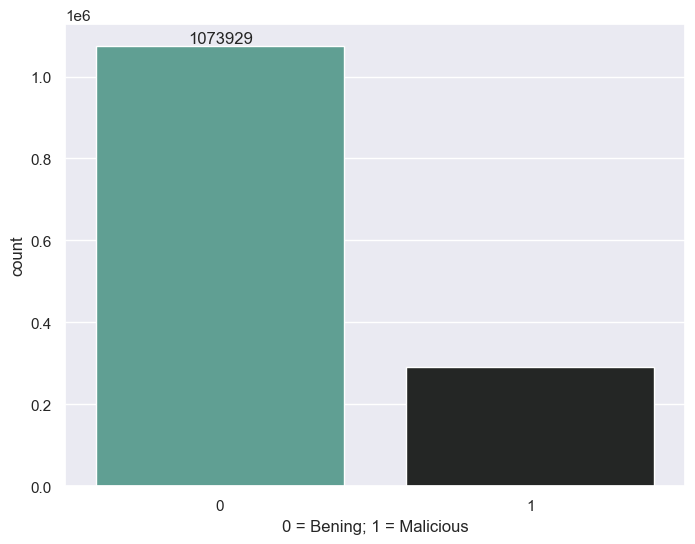

In [25]:
label_benign = df_dataset["Label"].value_counts()[[0]].sum()
label_malicious = df_dataset["Label"].value_counts()[[1]].sum()

print(df_dataset.shape)

abs_values = [label_benign, label_malicious]
sns.set(rc={'figure.figsize':(8, 6)})
ax = sns.countplot(x=df_dataset[df_dataset.columns[-1]], 
              data = df_dataset,
              palette = 'dark:#5A9_r')
ax.bar_label(container=ax.containers[0], labels=[label_benign])
# ax.bar_label(container=ax.containers[1], labels=[label_malicious]) # fails compile in google colab
plt.xlabel(f"0 = Bening; 1 = Malicious")


##### Inbalance problem
There are two ways to solve this problem, 
1. Droping bening rows.
2. Sampling Malicious rows.

for this attempt, I am dropping bening rows until it gets balanced.


In [26]:
df_dataset.drop(df_dataset[df_dataset.Label == 0].index[-(label_benign-label_malicious):], inplace=True)

### Distributions labels after drop fixing imbalance problem

(580178, 77)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_40980\2905662639.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_dataset[df_dataset.columns[-1]],


Text(0.5, 0, '0 = Bening; 1 = Malicious')

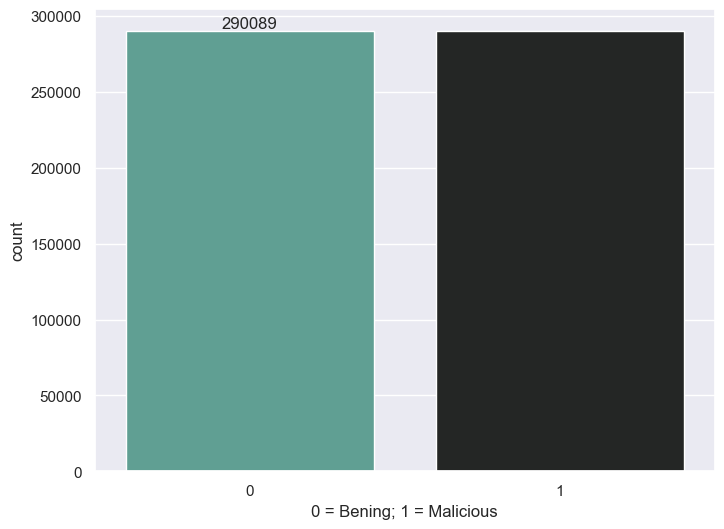

In [29]:
label_benign = df_dataset["Label"].value_counts()[[0]].sum()
label_malicious = df_dataset["Label"].value_counts()[[1]].sum()

print(df_dataset.shape)

abs_values = [label_benign, label_malicious]
sns.set(rc={'figure.figsize':(8, 6)})
ax = sns.countplot(x=df_dataset[df_dataset.columns[-1]], 
              data = df_dataset,
              palette = 'dark:#5A9_r')
ax.bar_label(container=ax.containers[0], labels=[label_benign])
# ax.bar_label(container=ax.containers[1], labels=[label_malicious]) # fails compile in google colab
plt.xlabel(f"0 = Bening; 1 = Malicious")

### Saving the Dataset as a csv file

In [28]:
df_dataset.to_csv("processed_dataset_in_2.csv", index=False)